# Machine Translation [MT]

***Machine Translation (MT)*** is a technology that automatically translates text using termbases and advanced grammatical, syntactic and semantic analysis techniques

# Types of Machine Trasalation

1. Rule Based Machine Translation[RBMT]
2. Statistical Machine Translation[SMT]
3. Example based Machine Translation [EBMT]
4. Neural Machine Translation[NMT]
5. Hybrid Methods

## Rule Based Machine Translation

Also called Knowledge Based Machine Translation,it works by parsing a source sentence to identify words and analyze its structure, and then converting it into the target language based on a manually determined set of rules encoded by linguistic experts. The rules attempt to define correspondences between the structure of the source language and that of the target language.

![](images/rule_based_translation.png)

**Disadvantages**
1. Development of an RBMT system is time-consuming and labor-intensive and may take several years for one language pair.
2. Human-encoded rules are unable to cover all possible linguistic phenomena and conflicts between existing rules may lead to poor translation quality when facing real-life texts.RBMT engines don’t deal well with slang or metaphorical texts

There are three types of RBMT systems:

**1. Direct Method (DIctionary Based Machine Translation)**
<br>
Source language text are translated without passing through an intermediary representation. The words will be
translated as a dictionary does word by word, usually without much correlation of meaning between them

**2 Transfer Rule Based Machine Translation** 
<br>
Morphological and syntactical analysis is the fundamental approaches in Transfer based systems. Here source
language text is converted into less language specific representation and same level of abstraction is generated
with the help of grammar rules and bilingual dictionaries

Eg- [Mantra](https://mantra-rajbhasha.rb-aai.in/) -A transfer based tool by Indian Govt

**3 Interlingual RBMT Systems**
<br>
 In this method, source language is translated into an intermediary representation which does not depends on any languages. Target language is derived from this auxiliary form of representation

# Challenges in Probability matrix of English to French

1. Reordering
2. One to many or many to one
3. Words can appear and disappear from nowhere

## Statistical Machine Translation[SMT]

SMT works by training the translation engine with a very large volume of bilingual (source texts and their translations) and monolingual corpora. The system looks for statistical correlations between source texts and translations, both for entire segments and for shorter phrases within each segment, building a so-called translation model. It then generates confidence scores for how likely it is that a given source text will map to a translation. The translation engine itself has no notion of rules or grammar. SMT is the core of systems used by Google Translate and Bing Translator

**Disadvantage**

1. It requires very large and well-organized bilingual corpora for each language pair
2. SMT engines fail when presented with texts that are not similar to material in the training corpora.Therefore, it is important to train the engine with texts that are similar to the material that will be translated

## Example Based Machine Translation

In an EBMT system, a sentence is translated by analogy. A number of existing translation pairs of source and target sentences are used as examples. When a new source sentence is to be translated, the examples are retrieved to find similar ones in the source, then the target sentence is generated by imitating the translation of the matched examples. Because the hit rate for long sentences is very low, usually the examples and the source sentence are broken down into small fragments.

**Diasdvantage**

1. It requires large amount of examples for translation
2. When there is no similar example found, the translation quality may be very low

## Neural Machine Translation

Neural machine translation (NMT) is based on the paradigm of machine learning and is the newest approach to MT. NMT uses neural networks that consist of nodes which can hold single words, phrases, or longer segments and relate to each other in a web of complex relationships based on bilingual texts used to train the system.

## Hybrid  Machine Translation

All the above methods have their shortcomings, and many hybrid MT approaches have been proposed. The two main categories of hybrid systems are:

1. Rule-based engines using statistical translation for post processing and cleanup,
2. Statistical systems guided by rule-based engines.
3. Either of the above with some input from neural machine translation system.

Almost all the practical MT systems adopt hybrid approaches to a certain extent, combining rule-based and statistical approaches. Most recently, more and more systems also take advantage of NMT to different degrees.

![](images/translation_history.png)

## Application of Machine 

# Evaluation Metric for Machine Translation

**Goal of evaluating Language Model**<br>
A good language model is one which prefer good sentences to bad ones which means higher probabilities to “real” and “frequently observed” sentences than "ungrammatical" or "rarely observed" sentences.

Evaluation for Comapring Models

**1. Extrinsic Evaluation (in-vivo)**

We put each model in the downstream task like spelling corrector,speech recognizer,MT system and get the accuracy for each model and compare them.
Speech Corrector - How many mispelled words corrected properly.
Speech Recognizer - How many words translated correctly.
MT System - 

Difficulty of Extrinsic Evaluator
1. Time Consuming;can take days or weeks
2. Expensive to evaluate

**2. Intrinsic Evaluation**

Intrinsically about the language model rather than any specific task.

**Perplexity**

Perplexity is a bad approximation to an extreme extrinsic evaluation, in cases where the test dataset does NOT look just like the training set. Thus, it is useful only at the early stages of experiment. So later in experiment extrinsic evaluation should also be used.

**Intuition to Perplexity**

How well can we predict the next word tells us how good the model is.

***So a better model of a text is the one which assigns a higher probability to the word that actually occurs.***

Best language model is one that best predicts an unseen test set or **Gives the highest P(sentence)**
 
**Perplexity is the probability of the test set,normalized by the number of words**<br>

***Minimizing perplexity is the same as maximizing probability***

![](images/perplexity.png)
![](images/perplexity1.png)


Let us take few examples and see how the perplexity value varies in different scenarios.<br>
Play with it to get better intuition [link]
![](images/perplexity_cal.png)


**Another intuition to Perplexity**

***Perplexity is weighted equivalent branching factor.***<br>
On average,how many things can occur next.

Other Evalaution Metrics 
1. **Word error rate (WER)** is defined based on the distance between the system output and the reference translation at the word level.
2. **Position-independent error rate (PER)** calculates the word error rate by treating each sentence as a bag of words and ignoring the word order.
3. **Bilingual Evaluation Understudy (BLEU)** computes the n-gram precision rather than word error rate.
4. **Metric for Evaluation of Translation with Explicit Ordering (METEOR)** takes stemming and synonyms into consideration.

# Neural Machine Translation

Different Architectures using different neural networks has been proposed over the years.In this section, we will learn some of the famous architectures,understand their working and later implement them from scratch in Pytorch.

1. Seq2Seq Model

2. Seq2Seq with Attention

3. Convolution Based Models

4. Transformer (dispensing with recurrence and convolutions entirely)

## Seq2Seq [Encoder - Decoder]

### Architecure 

Research Paper -[Sequence to Sequence Learning with Neural Networks paper](https://arxiv.org/abs/1409.3215)<br>
Implementation Code - [Colab link](colab link)

The most common sequence-to-sequence (seq2seq) models are encoder-decoder models, which (commonly) use a recurrent neural network (RNN) to encode the source (input) sentence into a single vector. In this notebook, we'll refer to this single vector as a context vector. You can think of the context vector as being an abstract representation of the entire input sentence. This vector is then decoded by a second RNN which learns to output the target (output) sentence by generating it one word at a time.

![](images/encoder_decoder.png)

**Encoder Sequence**
At each time step,
1. Input to the encoder 
    - current word, $x_t$ 
    - hidden state from the previous time-step, $h_{t-1}$
2. Output from the encoder RNN
    - a new hidden state $h_{t}$
    
We can represent the encoder as
$$h_t = \text{EncoderRNN}(x_t, h_{t-1})$$
 
Once the final word, $x_T$, has been passed into the RNN, we use the final hidden state, $h_T$, as the context vector, i.e. $h_T = z$. This is a vector representation of the entire source sentence

**Decoder Sequence**
 At each time-step,
 1. Input to the decoder 
     - current word, $y_t$ 
     - the hidden state from the previous time-step, $s_{t-1}$ where the initial decoder hidden state, $s_0$, is the context vector, $s_0 = z = h_T$, i.e. the initial decoder hidden state is the final encoder hidden state
 2. Output from the decoder
     - $s_t$ to predict (by passing it through a Linear layer, shown in purple) what we think is the next word in the sequence, $\hat{y}_t$.
We can represent the decoder as 
$$s_t = \text{DecoderRNN}(y_t, s_{t-1})$$

**Calculating loss**<br>
Once we have our predicted target sentence, $\hat{Y} = \{ \hat{y}_1, \hat{y}_2, ..., \hat{y}_T \}$, we compare it against our actual target sentence, $Y = \{ y_1, y_2, ..., y_T \}$, to calculate our loss. We then use this loss to update all of the parameters in our model.

**Few things to note**

1. We reverse the order of the input which they believe "introduces many short term dependencies in the data that make the optimization problem much easier"

**Intuiton**<br>
Sequence<br>
A B C -> alpha beta gamma delta

In this setting, we have to go through the full source sequence (ABC) before starting to predict alpha, where the translator might have forgotten about A by then. But when you do this as,

C B A -> alpha beta gamma delta
You have a strong communication link from A to alpha, where A is "probably" related to alpha in the translation.

**Note** - But not always true

2. The initial hidden state, $h_0$,on the encoder side is usually either initialized to zeros or a learned parameter.
3. We always use $<sos>$ for the first input to the decoder, $y_1$, but for subsequent inputs, $y_{t>1}$, we will sometimes use the actual, ground truth next word in the sequence, $y_t$ and sometimes use the word predicted by our decoder, $\hat{y}_{t-1}$. This is called **teacher forcing**
4. When training/testing our model, we always know how many words are in our target sentence, so we stop generating words once we hit that many. During inference (i.e. real world usage) it is common to keep generating words until the model outputs an $<eos>$ token or after a certain amount of words have been generated.


### Implementation Details

**1. Objective**<br>
We'll be building a machine learning model to go from once sequence to another, using PyTorch and TorchText. This will be done on German to English translations, but the models can be applied to any problem that involves going from one sequence to another, such as summarization.

**2. Dataset**<br>
The dataset we'll be using is the Multi30k dataset. This is a dataset with ~30,000 parallel English, German and French sentences, each with ~12 words per sentence

**3. Steps Followed**

1. Create Tokenizers
    - We use Spacy models to load English and German language so that we can access the tokeniers.
    - We use Torch Text ***Fields*** for preprocessing our tokens.
2. Create train_data,valid_data,test_data
3. Building Vocabulary
    - Using training data, we'll build the vocabulary for the source and target languages. The vocabulary is used to associate each unique token with an index (an integer) and this is used to build a one-hot encoding for each token (a vector of all zeros except for the position represented by the index, which is 1).We only allow tokens that appear at least 2 times to appear in our vocabulary. Tokens that appear only once are converted into an <unk> (unknown) token
<br>    
4. Create train_iterator,valid_iterator,test_iterator
    - Use iterators ,to return a batch of data which will have a src attribute (the PyTorch tensors containing a batch of numericalized source sentences) and a trg attribute for passing to the model.Now the batch of data is represented as sequence of corresponding indexes, using the vocabulary.
    - We use a BucketIterator instead of the standard Iterator as it creates batches in such a way that it minimizes the amount of padding in both the source and target sentences.
    
5. Build the encoder,2 layer LSTM.The paper we are implementing uses a 4-layer LSTM, but in the interest of training time we cut this down to 2-layers.
6. Build the decoder, 2-layer LSTM instead of 4(in the paper)
7. Build the seq2seq model.
8. Training the seq2seq model.
9. Evalaution of seq2seq model.


**Encoder Architecture**

![](images/encoder.png)

For a multi-layer RNN, the input sentence, $X$, goes into the first (bottom) layer of the RNN and hidden states, $H=\{h_1, h_2, ..., h_T\}$, output by this layer are used as inputs to the RNN in the layer above. Thus, representing each layer with a superscript, the hidden states in the first layer are given by:

$$h_t^1 = \text{EncoderRNN}^1(x_t, h_{t-1}^1)$$
The hidden states in the second layer are given by:

$$h_t^2 = \text{EncoderRNN}^2(h_t^1, h_{t-1}^2)$$

Using a multi-layer RNN also means we'll also need an initial hidden state as input per layer, $h_0^l$, and we will also output a context vector per layer, $z^l$.

As we are using LSTM cells, which instead of just taking in a hidden state and returning a new hidden state per time-step, also take in and return a cell state, $c_t$, per time-step.
$$\begin{align*}
        h_t= \text{RNN}(x_t, h_{t-1})\\
(h_t, c_t)= \text{LSTM}(x_t, (h_{t-1}, c_{t-1}))
\end{align*}$$

Extending our multi-layer equations to LSTMs, we get:

$$\begin{align*}
(h_t^1, c_t^1) &amp;= \text{EncoderLSTM}^1(x_t, (h_{t-1}^1, c_{t-1}^1))\\
(h_t^2, c_t^2) &amp;= \text{EncoderLSTM}^2(h_t^1, (h_{t-1}^2, c_{t-1}^2))
\end{align*}$$
Note how only our hidden state from the first layer is passed as input to the second layer, and not the cell state.

**Decoder Architecture**
![](images/decoder.png)

The first layer will receive a hidden and cell state from the previous time-step, $(s_{t-1}^1, c_{t-1}^1)$, and feed it through the LSTM with the current token, $y_t$, to produce a new hidden and cell state, $(s_t^1, c_t^1)$. The subsequent layers will use the hidden state from the layer below, $s_t^{l-1}$, and the previous hidden and cell states from their layer, $(s_{t-1}^l, c_{t-1}^l)$. This provides equations very similar to those in the encoder.

$$\begin{align*}
(s_t^1, c_t^1) = \text{DecoderLSTM}^1(y_t, (s_{t-1}^1, c_{t-1}^1))\\
(s_t^2, c_t^2) = \text{DecoderLSTM}^2(s_t^1, (s_{t-1}^2, c_{t-1}^2))
\end{align*}$$
Remember that the initial hidden and cell states to our decoder are our context vectors, which are the final hidden and cell states of our encoder from the same layer, i.e. $(s_0^l,c_0^l)=z^l=(h_T^l,c_T^l)$.

We then pass the hidden state from the top layer of the RNN, $s_t^L$, through a linear layer, $f$, to make a prediction of what the next token in the target (output) sequence should be, $\hat{y}_{t+1}$.

$$\hat{y}_{t+1} = f(s_t^L)$$

**Seq2Seq Model** -Full Model

![](images/encoder_decoder_arch.png)

### Limitations

1. The fixed size of the context matrix passed from the encoder to the decoder is a bottleneck.
2. Difficulty of encoding long sequences and recalling long-term dependancies

## RNN-Encoder Decoder for Statistical Machine Translation

Research Paper<br>
[Learning Phrase Representations using RNN Encoder-Decoder for Statistical Machine Translation](https://arxiv.org/abs/1406.1078)<br>
[Empirical Evaluation of Gated Recurrent Neural Networks on Sequence Modeling](https://arxiv.org/abs/1412.3555)<br>
Colab Link - [](link)


### Architecture Details

**1. Encoder**

1. ENcoder uses single layer GRU,instead of multi-layer LSTM used in vanila Encoder -Decoder Seq2Seq model,.<br>
       GRU only requires and returns a hidden state, there is no cell state like in the LSTM.

$$\begin{align*}
h_t = \text{GRU}(x_t, h_{t-1})\\
\end{align*}$$


Input sequence- $X = \{x_1, x_2, ... , x_T\}$<br>
Hidden states, $H = \{h_1, h_2, ..., h_T\}$, <br> 
Context vector (the final hidden state), $z=h_T$ <br>
![](images/encoder_gru.png)

**2. Decoder**<br>
1. GRU in the decoder now not only takes the target token, $y_t$ and the previous hidden state $s_{t-1}$ as inputs, but also takes the context vector $z$.
$$s_t = \text{DecoderGRU}(y_t, s_{t-1}, z)$$
2. Linear layer takes the current token, $\hat{y}_t$ and the context vector, $z$ along with  top-layer decoder hidden state at that time-step, $s_t$,  as the input.
$$\hat{y}_{t+1} = f(y_t, s_t, z)$$

![](images/decoder_gru.png)

What are the inputs to the first generating token???

**Seq2Seq Model** 
![](images/encoder_decoder_gru.png)


## Seq2Seq with Attention


The most important distinguishing feature of this approach from the basic encoder–decoder is that
it does not attempt to encode a whole input sentence into a single fixed-length vector. Instead, it encodes
the input sentence into a sequence of vectors and chooses a subset of these vectors adaptively
while decoding the translation.

1. Additive Attention-[Neural Machine Translation by Jointly Learning to Align and Translate](https://arxiv.org/abs/1409.0473)
2. Additive and Multiplicative Attention (https://arxiv.org/abs/1508.04025)

![](images/attention_eq.png)

### Additive Attention

It is an extension to the encoder–decoder model which learns to align and translate jointly. Each time the proposed model generates a word in a translation, it (soft-)searches for a set of positions in a source sentence where the most relevant information is concentrated(**Attention**). The model then predicts a target word based on the context vectors associated with these source positions and all the previous generated target words.


**Attention** works by first, calculating an attention vector, $a$, that is the length of the source sentence. The attention vector has the property that each element is between 0 and 1, and the entire vector sums to 1. We then calculate a weighted sum of our source sentence hidden states, $H$, to get a weighted source vector, $w$.

$$w = \sum_{i}a_ih_i$$
We calculate a new weighted source vector every time-step when decoding, using it as input to our decoder RNN as well as the linear layer to make a prediction. 


We'll explain how to do all of this below.

#### Architecture Details

**1. Encoder**

1. We use single layer bidirectional RNN.With a bidirectional RNN, we have two RNNs in each layer. A forward RNN going over the sentence from left to right (shown below in green), and a backward RNN going over the sentence from right to left (yellow)

$$\begin{align*}
h_t^\rightarrow = \text{EncoderGRU}^\rightarrow(x_t^\rightarrow,h_t^\rightarrow)\\
h_t^\leftarrow= \text{EncoderGRU}^\leftarrow(x_t^\leftarrow,h_t^\leftarrow)
\end{align*}$$

Input sequence- $X = \{x_1, x_2, ... , x_T\}$<br>
Hidden states<br>
$H^\rightarrow = \{h_1^\rightarrow, h_2^\rightarrow, ..., h_T^\rightarrow\}$, <br> 
$H^\leftarrow = \{h_1^\leftarrow, h_2^\leftarrow, ..., h_T^\leftarrow\}$, <br> 
Two Context vectors(the final hidden state) ***but they are not the final context vector that will be fed into Decoder.We will be using Attention mechanism to calculate the context vector for decoder*** :<br>
    One from the forward RNN after it has seen the final word in the sentence, $z^\rightarrow=h_T^\rightarrow$<BR>
 One from the backward RNN after it has seen the first word in the sentence, $z^\leftarrow=h_T^\leftarrow$
  
![](images/encoder_bidir.png)  


**2. Attention**<br>
Intuitively,this layer takes what we have decoded so far, $s_{t-1}$, and all of what we have encoded, $H$, to produce a vector, $a_t$, that represents which words in the source sentence we should pay the most attention to in order to correctly predict the next word to decode, $\hat{y}_{t+1}$.

![](images/score.png)


![](images/attention_eq.png)

In the equation above :<br>
$h_{t}$ - Previous hidden state of decoder<br>
$h_{s}$ - All the hidden states of Encoder<br>

Working on the 2nd equation<br>
**1. Calculate the energy, $E_t$**
$$E_t = \tanh(\text{attn}(s_{t-1}, H))$$
1. Take the encoder hidden states and concat them together,represented as **H** in the equation of size [No of hidden units in encoder(n),No of elements in input sequence(t)]
2. Take the previous decoder hidden state,**s<sub>t-1</sub>** of size  [No of hidden units in decoder(n) , 1]
3. Concat them together and pass them through a linear layer **(attn)** and a **$\tanh$** activation function
    
**2. Multiplying with $v_a^{T}$**    
    The ouput is of size [No of hidden units in decoder(n),No of elements in input sequence(t)].However for each example in the batch ,the attention should be over the length of the source sentence.Hence we mulitpy it with $v_a^{T}$ of size [No of hidden units in decoder(n),1].

**3. Applying softmax**<br>
We then pass the attention vector through **softmax** layer to make value between 0 and 1.This gives us the attention over the source sentence.

**3. Decoder**
1. Use this attention vector to create a weighted source vector, $w_t$, denoted by weighted, which is a weighted sum of the encoder hidden states, $H$, using $a_t$ as the weights.

$$w_t = a_t H$$
2. The input word (that has been embedded), $y_t$, the weighted source vector, $w_t$, and the previous decoder hidden state, $s_{t-1}$, are then all passed into the decoder RNN, with $y_t$ and $w_t$ being concatenated together.

$$s_t = \text{DecoderGRU}(y_t, w_t, s_{t-1})$$

3. We then pass $y_t$, $w_t$ and $s_t$ through the linear layer, $f$, to make a prediction of the next word in the target sentence, $\hat{y}_{t+1}$. This is done by concatenating them all together.

$$\hat{y}_{t+1} = f(y_t, w_t, s_t)$$

![](images/decoder_bidir.png)

# Implementing Attention (toy example)

If you want to understand more on how attention works,look at this toy example of implementing Attention in isolation from a larger model below.Here our objective is to understand how attention context vectors is calculated 

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Inputs to the scoring function

1. Decoder Hidden State<br>
Let's start by looking at the inputs we'll give to the scoring function. We will assume we're in the first step in the decoding phase. The first input to the scoring function is the hidden state of decoder (assuming a toy RNN with three hidden nodes -- not usable in real life, but easier to illustrate):

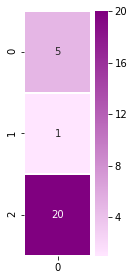

In [3]:
dec_hidden_state = [5,1,20]
# Let's visualize our decoder hidden state
plt.figure(figsize=(1.5, 4.5))
sns.heatmap(np.transpose(np.matrix(dec_hidden_state)), annot=True, cmap=sns.light_palette("purple", as_cmap=True), linewidths=1)

## Encoder Hidden State - Stack of all hidden states  

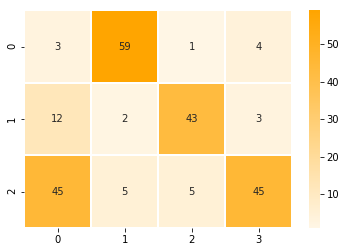

In [4]:
annotations = np.transpose([[3,12,45], [59,2,5], [1,43,5], [4,3,45.3]])
#each column is a hidden state of an encoder time step
ax = sns.heatmap(annotations, annot=True, cmap=sns.light_palette("orange", as_cmap=True), linewidths=1)

## Calculation the score 

![](images/score_dot.png)

In [5]:
#To do that, we'll have to transpose dec_hidden_state and matrix multiply it with annotations.
def dot_attention_score(dec_hidden_state, annotations):
    # TODO: return the product of dec_hidden_state transpose and enc_hidden_states
    return np.matmul(np.transpose(dec_hidden_state), annotations)
    
attention_weights_raw = dot_attention_score(dec_hidden_state, annotations)
attention_weights_raw

array([927., 397., 148., 929.])

Looking at these scores, can you guess which of the four vectors will get the most attention from the decoder at this time step?

## Apply Softmax

Now that we have our scores, let's apply softmax:

In [17]:
def softmax(x):
    x = np.array(x, dtype=np.float128)
    e_x = np.exp(x)
    return e_x / e_x.sum(axis=0) 

attention_weights = softmax(attention_weights_raw)
attention_weights

AttributeError: module 'numpy' has no attribute 'float128'

In [18]:
attention_weights=np.array([0.11920292,  7.9471515e-232,  5.7661442e-340,  0.88079708])

In [19]:
attention_weights

array([1.1920292e-001, 7.9471515e-232, 0.0000000e+000, 8.8079708e-001])

## Applying the scores back on the annotations

Now that we have our scores, let's multiply each annotation by its score to proceed closer to the attention context vector. 

$$w_t = a_t H$$

In [20]:
def apply_attention_scores(attention_weights, annotations):
    # TODO: Multiple the annotations by their weights
    return attention_weights * annotations

applied_attention = apply_attention_scores(attention_weights, annotations)
applied_attention

array([[3.57608760e-001, 4.68881938e-230, 0.00000000e+000,
        3.52318832e+000],
       [1.43043504e+000, 1.58943030e-231, 0.00000000e+000,
        2.64239124e+000],
       [5.36413140e+000, 3.97357575e-231, 0.00000000e+000,
        3.99001077e+001]])

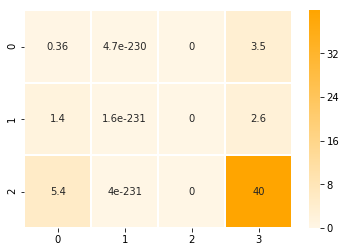

In [21]:
# Let's visualize our annotations after applying attention to them
ax = sns.heatmap(applied_attention, annot=True, cmap=sns.light_palette("orange", as_cmap=True), linewidths=1)

## Calculating the Attention Context Vector

All that remains to produce our attention context vector now is to sum up the four columns to produce a single attention context vector

In [23]:
def calculate_attention_vector(applied_attention):
    return np.sum(applied_attention, axis=1)

attention_vector = calculate_attention_vector(applied_attention)
attention_vector

array([ 3.88079708,  4.07282628, 45.26423912])

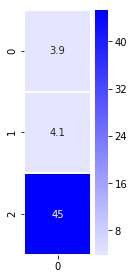

In [24]:
# Let's visualize the attention context vector
plt.figure(figsize=(1.5, 4.5))
sns.heatmap(np.transpose(np.matrix(attention_vector)), annot=True, cmap=sns.light_palette("Blue", as_cmap=True), linewidths=1)

Now that we have the context vector, we can concatinate it with the hidden state and pass it through a hidden layer to produce the the result of this decoding time step.

In [12]:
print(np.__version__)

1.14.5


## Transformer

**Motivation**

**1. Sequential Nature of RNN**<br>
When we process a sequence using RNNs, each hidden state depends on the previous hidden state. This becomes a major pain point on GPUs: GPUs have a lot of computational capability and they hate having to wait for data to become available. Even with technologies like CuDNN, RNNs are painfully inefficient and slow on the GPU.

**2. Long Range Dependencies**<br>
RNN based architectures finds difficulty in learning long-range dependencies within the input and output sequences.
In essence, there are three kinds of dependencies in neural machine translations: dependencies between
1. the input and output tokens
2. the input tokens themselves
3. the output tokens themselves.

The traditional attention mechanism largely solved the first dependency by giving the decoder access to the entire input sequence.**Transformer** extend this mechanism to the processing input and output sentences as well by  allowing the encoder and decoder to see the entire input sequence all at once, directly modeling these dependencies using attention.



### Architecture Details
![](images/transformer_Arch.png)


Each sub-layer (Attention + Feed Forwad Network) in each encoder and decoder has a residual connection around it, and is followed by a layer-normalization step.

Let us try to uncover each module one by one.

#### Encoding Stack

The encoding component is a stack of encoders (the paper stacks six of them on top of each other.The encoders are all identical in structure (yet they do not share weights). Each one is broken down into two sub-layers:
1. Multi Head Attention - a refined version of Self Attention
2. Feed Forward Neural Network


![](images/encoder_transformer.png)


**1. Sef Attention**

 Self-attention is the method the Transformer uses to bake the “understanding” of other relevant words into the one we’re currently processing.
 ![](images/self_attention.png)
 As we are encoding the word "it" in encoder #5 (the top encoder in the stack), part of the attention mechanism was focusing on "The Animal", and baked a part of its representation into the encoding of "it".
 
 Steps carried out in the Encoder Stack
 
 1. For each encoder’s input vectors (in this case, the embedding of each word),we **create a QUERY vector, a KEY vector, and a VALUE vector**.These vectors are created by multiplying the embedding by three matrices $$W_{q},W_{k},W_{v}$$ that we train during the training process.
 2. **Calculating the self-attention score for each word of the input sentence against the current input vector**. The score determines how much focus to place on other parts of the input sentence as we encode a word at a certain position.The score is calculated by taking the **dot product of the QUERY vector with the KEY vector of the respective word we’re scoring**.
 3. **For stable gradients**,divide the score by 8.(the square root of the dimension of the key vectors used in the paper – 64).
 4. **Pass the values through softmax** to cap the values between 0 and 1.The softmax score determines how much each word will be expressed at this position.
 5. **Multiply each VALVUE vector by the softmax score** (in preparation to sum them up). The intuition here is to keep intact the values of the word(s) we want to focus on, and drown-out irrelevant words (by multiplying them by tiny numbers like 0.001, for example).
 6. **Sum up the weighted value vectors**. This produces the output of the self-attention layer at this position (for the first word).
 
![](images/multi_head_attention.png)

**Multi Head Attention**<br>
With Multi-Head Attention,we have not only one, but multiple sets of Query/Key/Value weight matrices (the Transformer uses eight attention heads, so we end up with eight sets for each encoder/decoder).
 
That means,If we do the same self-attention calculation we outlined above just eight different times with different weight matrices, we end up with eight different attention scores.
7. Concatenate the resulting attention scores.

**Feed Forward Network**<br>
8. Pass the concatenated attention scores to a linear layer FFN to produce the output of the layer i.e  multiply concatenated attention scores with the  Weight Matrix W<sub>O</sub>

![](images/multi_head_attention1.png)
Here h=8 

#### Decoding Stack

Similar to the encoder stack,decoding part has a stack of decoders (the paper stacks six of them on top of each other.The decoders are all identical in structure (yet they do not share weights). Each one is broken down into three sub-layers:
1. Multi Head Attention[decoder] 
2. Multi-head attention over the output of the encoder stack [from encoder]
2. Feed Forward Neural Network

![](images/decoder_attention.png)

**Steps carried out in Decoding Stack**

1. The output vector of each step is fed to the bottom decoder.
2. Multi head Attention[decoder] layer calculates the attention score.
***Note-the self-attention layer is only allowed to attend to earlier positions in the output sequence. This is done by masking future positions (setting them to -inf) before the softmax step in the self-attention calculation.***
3. The output of the top encoder is then transformed into a set of attention vectors K and V.and fed in the multi head attention.
4. Multi Head attention[from encoder] creates its Queries matrix from the layer below it, and  Keys and Values matrix from the output of the encoder stack.
5. Decoder stack output the score .
6. The score is fed to a linear layer to produce output equal to the size of the vacabulary.
7. The score is then turned into probabilities using softmax.The cell with the highest probability is chosen, and the word associated with it is produced as the output for this time step.
8. The output for this time step is fed to the bottom decoder in the next time step.
9. The following steps repeat the process until a special symbol is reached indicating the transformer decoder has completed its output.

#### Other things to note in the architecture**

1. Positional Encoding
2. Loss Function -
3. Hands on aTTENTION bASICS https://github.com/udacity/NLP-Exercises/blob/master/2.5-attention/%5BSOLUTION%5D%20Attention%20Basics.ipynb

# Projects

1. Machine Translation
2. Text Summarization 
3. Questioning Answering 
4. Chatbot etc
5. Conv WaveNet Bytenet

# Datasets

https://github.com/tensorflow/tensor2tensor#suggested-datasets-and-models

2. [Europarl](https://www.statmt.org/europarl/)
3. [Movie Subtitles]
4. [Translated News and Books]
5. [Wikipedia]
6. [OPUS-Open Parallel Corpus](http://opus.nlpl.eu/)

# References

1. [A STUDY OF MACHINE TRANSLATION METHODS AND THEIR CHALLENGES](https://www.ijarse.com/images/fullpdf/320.pdf)
2. [Machine Translation-Introduction](https://www.andovar.com/machine-translation/)
3. [Comparison_of_different_machine_translation_approaches](https://en.wikipedia.org/wiki/Comparison_of_different_machine_translation_approaches)
4. [Develop Machine Learning Translation using Keras](https://machinelearningmastery.com/develop-neural-machine-translation-system-keras/)
5. [Perplexity](https://towardsdatascience.com/perplexity-intuition-and-derivation-105dd481c8f3)
[cs124](https://web.stanford.edu/class/cs124/)
6. [Visualizing A Neural Machine Translation Model](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/)
7. [Google Machine Translation System](https://arxiv.org/pdf/1609.08144.pdf)
8. [Attention is All you need-Video](https://www.youtube.com/watch?v=rBCqOTEfxvg)<br>
Transformer<br>
9. [Illustrated Transformer](http://jalammar.github.io/illustrated-transformer/)
10. [Deep learning State of the Art 2019](https://www.youtube.com/watch?v=53YvP6gdD7U&feature=youtu.be&t=335)
11. [Paper Dissected: “Attention is All You Need” Explained](http://mlexplained.com/2017/12/29/attention-is-all-you-need-explained/)
12. [Harvard NLP -The Annotated Transformer](http://nlp.seas.harvard.edu/2018/04/03/attention.html#decoder)